# 020 Reading data

> COM6018

*Copyright &copy; 2023 Jon Barker, University of Sheffield. All rights reserved*.

In this lab class we are going to be working with some real datasets that store atmospheric carbon dioxide and methane concentrations measured over several decades. We will read the data from csv files and do all the data processing using the Python standard library and ideas that we saw in the previous lab class. Our aim will be to plot an easily interpretable graph that shows how the concentration of these gases has changed over time.

If you have used numpy and pandas packages before, you may realise that these would make this task easier, and indeed, this is the basic point of this lab. By first seeing how things would be done in pure Python, we will better appreciate the benefits of using specialised data science packages when we come to study them in the next couple of weeks.

## Step 1 - Reading in the CO2 data

The data is stored in two files

- `data/co2.csv`  - the carbon diaoxide data
- `data/ch4.csv`  - the methane data

Write a function called `read_co2_csv` that takes the file name and returns a list of dictionaries storing the data. i.e. the 'co2.csv' file would be read with,

```python
co2_data = read_csv('data/co2.csv')
```

Hint: Use the csv.DictReader function and refer to the course notes if you need to.  You will need to manually set the fieldnames parameter of the csv.DictReader to the correct value, i.e., `['Yr', 'Mn', 'Dy', 'CO2', 'NB', 'scale']`

You will also find that the first twenty of so items are not valid because the csv file has 'comment lines' starting with a '%' symbol. DictReader does not know how to skip these lines and will try to read them as data.  Try to think how you can filter out these entries in a general way. If you can't manage this just count how many invalid lines there are and remove them from the list of dictionaries before returning the list from your function eg.  list_of_dicts = list_of_dicts[20:]

After you have written your function, run the test cell below to check that it works. 

In [27]:
# SOLUTION 1 - using a list comprehension to remove the comment lines
import csv

def read_co2_csv(filename):
    with open(filename, 'r') as fp:
        # Only keep the lines that do not start with '%'
        lines = [line for line in fp.readlines() if not line.startswith('%')]
        # Note, fieldnames are provided below as they are not in csv format in the file
        fieldnames = ['Yr', 'Mn', 'Dy', 'CO2', 'NB', 'scale']
        reader = csv.DictReader(lines, fieldnames=fieldnames, skipinitialspace=True)
        data = [row for row in reader]
    return data

In [28]:
# SOLUTION 2 - using 'filter' and a 'lambda' function to remove the comment lines
import csv

def read_co2_csv(filename):
    with open(filename, 'r') as fp:
        lines = filter(lambda x: not x.startswith('%'), fp.readlines())
        reader = csv.DictReader(lines, fieldnames=['Yr', 'Mn', 'Dy', 'CO2', 'NB', 'scale'], skipinitialspace=True)
        data = [row for row in reader]
    return data

In [29]:
# TEST
co2_data = read_co2_csv('data/co2.csv')
assert co2_data[0] == {'Yr': '1958', 'Mn': '01', 'Dy': '01', 'CO2': 'NaN', 'NB': '0', 'scale': '12.0'}
print("All tests passed!")

All tests passed!


## Step 2 - Reading in the CH4 data

The methane data 'data/ch4.csv' comes from another source and the file has a slightly different format. This time comment lines start with a '#' symbol. There are 148 lines of comments at the start of the file. The 149th line contains the field names. The data starts on the 150th line. The fields are separated by spaces rather than commas.

Write a function called 'read_ch4_csv' that takes the file name and returns a list of dictionaries storing the data. i.e. the 'ch4.csv' file would be read with,

```python
ch4_data = read_csv('data/ch4.csv')
```


In [30]:
# SOLUTION
def read_ch4_csv(filename):
    with open(filename, 'r') as fp:
        lines = filter(lambda x: not x.startswith('#'), fp.readlines())
        # This time we don't need to provide fields because there is a header row
        # in the file, but we need to specify the delimiter because it is not a comma
        reader = csv.DictReader(lines, skipinitialspace=True, delimiter=' ')
        data = [row for row in reader]
    return data

In [31]:
# TEST
ch4_data = read_ch4_csv('data/ch4.csv')
assert ch4_data[0] == {'site_code': 'MLO', 'year': '1987', 'month': '1', 'day': '1', 'hour': '0', 'minute': '0', 'second': '0', 'time_decimal': '1987.0', 'value': '-999.99', 'value_std_dev': '-99.99', 'nvalue': '0', 'latitude': '19.536', 'longitude': '-155.576', 'altitude': '3437.0', 'elevation': '3397.0', 'intake_height': '40.0', 'qcflag': '*..'}
print("All tests passed!")

All tests passed!


## Step 3 - Simplifying the data

Now that we've read the two datasets into memory, we need to simplify them. You will see that that two datasets have a lot of different fields. We are only interested in the date and the concentration of the gas. It would be convenient to convert both datasets into a common format, i.e., a list of dictionaries with just four fields, 'year', 'month', 'day' and 'co2_concentration' (or 'ch4_concentration') 

Note, that these fields have different names in the two datasets. In the co2 data they are called 'Yr', 'Mn', 'Dy' and 'CO2'. In the ch4 data they are called 'year', 'month', 'day' and 'value'.

Write a function called 'simplify_data' that takes two parameters: a list of dictionaries and a parameter called 'fields'. The fields parameter should be a dictionary that maps the field names in the original data to the field names in the simplified data. The function should return a list of dictionaries with the simplified data.

For example, the co2 data would be simplified with the following call,

```python
co2_data = simplify_data(co2_data, {'Yr':'year', 'Mn':'month', 'Dy':'day', 'CO2':'co2_concentration'})
```

and the ch4 data would be simplified with the following call,

```python
ch4_data = simplify_data(ch4_data, {'year':'year', 'month':'month', 'day':'day', 'value':'ch4_concentration'})
```

In [25]:
# SOLUTION 1 - a simple solution
def simplify_data(data, old_key_to_new_key_dict):
    new_data = []
    for item in data:
        new_item = {}
        for old_key in old_key_to_new_key_dict:
            new_key = old_key_to_new_key_dict[old_key]
            new_item[new_key] = item[old_key]
        new_data.append(new_item)
    return new_data

In [23]:
# SOLUTION 2 - elegant and more efficient one line solution but arguably less readable
def simplify_data(data, old_key_to_new_key_dict):
    return [{old_key_to_new_key_dict[k]: item[k] for k in old_key_to_new_key_dict} for item in data]

In [26]:
# TEST
ch4_data = simplify_data(ch4_data, {'year':'year', 'month':'month', 'day':'day', 'value':'ch4_concentration'})
co2_data = simplify_data(co2_data, {'Yr':'year', 'Mn':'month', 'Dy':'day', 'CO2':'co2_concentration'})

assert ch4_data[0] == {'year': '1987', 'month': '1', 'day': '1', 'ch4_concentration': '-999.99'}
assert co2_data[0] == {'year': '1958', 'month': '01', 'day': '01', 'co2_concentration': 'NaN'}

print("All tests passed!")

KeyError: 'value'

## Step 4 - Dealing with missing values

The next thing to note is that the data is incomplete. For some days there is no concentrations data. In the ch4 data, these missing values are indicated by a value of -999.99. In the co2 data, these missing values are indicated by a value of 'NaN'. In the next step we are simply going to remove these entries from the list of dictionaries.

Write a function called 'remove_missing_values' that takes a list of dictionaries and a parameter called 'missing_value'. The missing_value is the value that is used to mark missing data, i.e. 'NaN' for the co2 data. The function should return a list of dictionaries in which any entries that have missing values have been removed. Note, the missing values appear in the 'concentration' field in this case, but the function should check all the fields -- if any field has a missing value, the whole entry should be removed.

In [8]:
# SOLUTION

def remove_missing_values(data, missing_value):
    return [row for row in data if missing_value not in row.values()]

In [9]:
# TEST
ch4_data = remove_missing_values(ch4_data, '-999.99')
co2_data = remove_missing_values(co2_data, 'NaN')
assert len(ch4_data) == 12111
assert len(co2_data) == 17685


## Step 5 - Fixing the data types

### Step 5.1 - Fixing the types

You will notice that all the values in the data are strings. We need to convert them to the appropriate data types. For example, the year, month and data should all be integers, the concentration should be a float.

Write a function called 'fix_data_types' that takes a list of dictionaries and a parameter called field_types. The field_types parameter is a dictionary that maps field names to the appropriate data type. The function should return a list of dictionaries in which the values have been converted to the appropriate data types.

For example, the co2 data would be converted with the following call,

```python
co2_data = fix_data_types(co2_data, {'year':int, 'month':int, 'day':int, 'co2_concentration':float})
```

Note the type of a value can be changed with the following syntax,

```python
value = int(value)
```

or if the type int is stored as a variable called 'my_type',

```python
my_type = int
value = my_type(value)
```

In [10]:
# SOLUTION
def fix_data_types(data, fields):
    for row in data:
        for k in fields:
            row[k] = fields[k](row[k])
    return data

In [11]:
# TEST
ch4_data = fix_data_types(ch4_data, {'year':int, 'month':int, 'day':int, 'ch4_concentration':float})
co2_data = fix_data_types(co2_data, {'year':int, 'month':int, 'day':int, 'co2_concentration':float})
assert type(ch4_data[0]['year']) == int
assert type(ch4_data[0]['month']) == int
assert type(ch4_data[0]['day']) == int
assert type(ch4_data[0]['ch4_concentration']) == float
print("All tests passed!")

All tests passed!


### Step 5.2 - Fixing the units

There is a small detail that we must not miss. The co2 data and ch4 data both have entries called 'co2_concentration' and 'ch4_concentration' respectively. However, the units of these values are different. The co2 data is in parts per million (ppm) and the ch4 data is in parts per billion (ppb). To avoid later confusion, we need to convert the ch4 data to ppm.

We could write a general function to do this but to keep things simple we'll write a function called 'convert_ch4_concentration_to_ppm' that takes a list of dictionaries and converts the 'ch4_concentration' field to ppm by dividing its value by 1000. The function should return a list of dictionaries in which the 'ch4_concentration' field has been converted to ppm.

In [12]:
# SOLUTION
def convert_ch4_concentration_to_ppm(data):
    data = data.copy()
    for row in data:
        row['ch4_concentration'] = row['ch4_concentration'] * 1e-3
    return data

In [13]:
# TEST
ch4_data = convert_ch4_concentration_to_ppm(ch4_data)
assert ch4_data[0]['ch4_concentration'] == 1.70002
print("All tests passed!")

All tests passed!


## Step 6 - Making an index

In the next step we are going to combine the co2 and ch4 data into a single list of dictionaries with entries for year, month, day, co2 concentration and ch4 concentration. 

This is not entirely straightforward because we can't assume that all dates have both a co2 and a ch4 reading and we can't assume that the data is in the same order in both lists. In fact, you'll see that the co2 data starts and 1958 and the ch4 data starts in 1987. 

In order to match up the entries we will add an index to each dictionary. The index is a field that has a unique value and will be the same when both entries correspond to each other, i.e., in this case it can be made by combining the year, month and day fields into a single data string. e.g '1958-3-29'.

Write a function called 'make_index' that takes a list of dictionaries and a parameter called index_fields. The index_fields parameter is a list of the names of the fields to use to form the index. It should return a list of dictionaries with an extra field called 'index'. The value of the index field should be a string made by combining the values of the index_fields with a '-' character between them.

For example, the co2 data would be converted with the following call,

```python
co2_data = make_index(co2_data, ['year', 'month', 'day'])
```

After this is done the co2_data will be a list of dictionaries with entries that look like,

```json
{"year": 1958, "month": 3, "day": 29, "concentration": 315.71, "index": "1958-3-29"}
```

In [14]:
# SOLUTION 
def make_index(data, index_fields):
    index = {}
    for row in data:
       row['index'] = '-'.join(str(row[k]) for k in index_fields)
    return data

In [15]:
co2_data = make_index(co2_data, ['year', 'month', 'day'])
ch4_data = make_index(ch4_data, ['year', 'month', 'day'])
assert co2_data[0] == {'year': 1958, 'month': 3, 'day': 30, 'co2_concentration': 316.16, 'index': '1958-3-30'}
assert ch4_data[0] == {'year': 1987, 'month': 4, 'day': 3, 'ch4_concentration': 1.70002, 'index': '1987-4-3'}
print("All tests passed!")

All tests passed!


## Step 7 - Joining the data

### Step 7.1 - The naive algorithm

Now that we have an index we can join the two datasets together. We will do this by creating a new list of dictionaries with entries for year, month, day, co2 concentration and ch4 concentration.

This is potentially a computationally expensive process. We will do it in a naive we first and then we'll implement a more efficient algorithm. 

When doing the merge we are looking for index entries that appear in both datasets.

The basic approach requires a nested loop:

- For each entry in the first dataset
  - take the index (call this index1)
  - for each entry in the second dataset
    - take the index (call this index2)
    - if index1 == index2
      - create a new entry in the merged dataset with the fields from the first dataset and the fields from the second dataset
  
Write a function called 'join_data' that takes two lists of dictionaries and returns a list of dictionaries with the merged data. The function should use the naive algorithm described above.

Note, this might take a while to run. It takes about 7 seconds on my Macbook Pro.

In [16]:
# SOLUTION

def join_data(data1, data2):
    new_data = []
    for row in data1:
        for row2 in data2:
            if row['index'] == row2['index']:
                new_data.append({**row, **row2})
                continue
    return new_data

In [17]:
# TEST

joined_data = join_data(co2_data, ch4_data)
assert joined_data[0] == {'year': 1987, 'month': 4, 'day': 3, 'co2_concentration': 350.84, 'index': '1987-4-3', 'ch4_concentration': 1.70002}
print("All tests passed!")

All tests passed!


### Step 7.2 - A more efficient way to join data

The previous algorithm is very inefficient because it has a nested loop that needs to run over all the entries in both datasets. This will be slow, and worse, it will scale with the order of the product of the number of entries in the two datasets.

A more efficient approach is to make use of the fact that the index is unique. Rather than having to look through the second list to find the index, we could store that list as a dictionary, i.e. using the index as they key and the data entry's dictionary as the value. 

The new alogirithm would be:
  - convert the second list of dictionaries into a dictionary with the index as the key (call this index_dict)
  - for each entry in the first list of dictionaries
    - take the index (call this index1)
    - Lookup index1 in the index_dict, if it exists
      - create a new entry in the merged dataset with the fields from the first entry

Write a function called 'join_data_fast' that takes two lists of dictionaries and returns a list of dictionaries with the merged data using this faster approach


In [18]:
# SOLUTION
def join_data_fast(data1, data2):
    index = {row['index']: row for row in data1}
    return [{**index[row['index']], **row} for row in data2 if row['index'] in index]

In [19]:
# TEST
joined_data = join_data_fast(co2_data, ch4_data)
assert joined_data[0] == {'year': 1987, 'month': 4, 'day': 3, 'co2_concentration': 350.84, 'index': '1987-4-3', 'ch4_concentration': 1.70002}
print("All tests passed!")

All tests passed!


You can time the two functions using the special `%timeit` function that is available in the Jupyter environment. For example, you can time the two functions with the following commands,

```python
%timeit join_data(co2_data, ch4_data)
```

and

```python
%timeit join_data_fast(co2_data, ch4_data)
```

Try this in the cell below.


In [20]:
# SOLUTION
# %timeit join_data(co2_data, ch4_data)
# %timeit join_data_fast(co2_data, ch4_data)

On my Macbook Pro the first takes about 6 seconds and the second takes about 3 milliseconds. That's a speed up of 2000 times!

Using the right algorithm can make a huge difference to the performance of your code. Fortunately, we do not normally need to worry about this. Later in the module, we will be using Pandas for this type of processing. Not only does it have all these algorithms built in, but it is written in C, which makes it much faster than Python.


## Step 8 - Processing the data

Now that we have got the data into a single, simple format we can start to do some analysis.

Our first task will be to reduce the co2 and ch4 concentrations into a single value. We are particularly interested in the warming effect that these gases have. For a given concentration, the warming effect of ch4 is much greater than that of co2, however, the picture is a bit complicated because ch4 also breaks down much faster than co2. These two effects can be combined into one number called the 'Global Warming Potential' (GWP). The GWP is a measure of the total warming effect of a gas over a given time period. The GWP of co2 is defined to be 1, the GWP of ch4 is 25. Using this we can calculate the total warming effect of a given concentration of ch4 by multiplying the concentration by 25. This is called the 'CO2 equivalent' (CO2e) concentration. We can then just sum of the CO2e values for all the gases that we want to consider.

So lets add a new field to our data called co2e which will be formed by summing the co2 and ch4 concentrations multiplied by their GWP (i.e., 1 and 4 respectively).

Write a function called 'add_co2e' that takes a list of dictionaries and returns a list of dictionaries with an extra field called 'co2e'. The value of the co2e field should be the sum of the co2 and ch4 concentrations multiplied by their GWP.

In [21]:
# SOLUTION

def add_co2e(data):
    for row in data:
        row['co2e'] = row['ch4_concentration'] * 25 + row['co2_concentration']
    return data

In [22]:
# TEST 
co2e_data = add_co2e(joined_data)
assert co2e_data[0]['co2e'] == 393.34049999999996
print("All tests passed!")

All tests passed!


## Step 9 -- Plotting the data

We are now ready to try and plot the data. We want to see a graph of the co2e concentration over time.

We will perform the plot using the matplotlib library. This is a very powerful library for plotting data. It is also very complicated. We will only be using a small part of its functionality and we will look at how to use it in more detail later in the module.

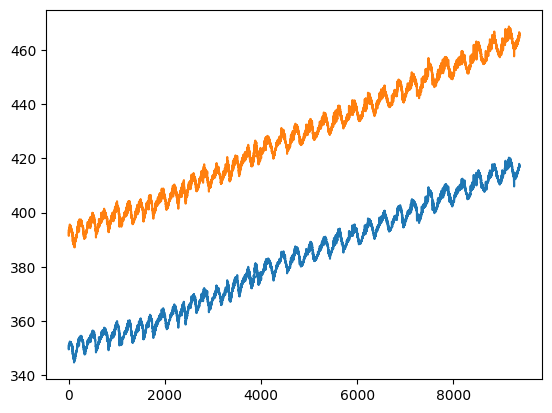

In [23]:
import matplotlib.pyplot as plt

plt.plot([row['co2_concentration'] for row in co2e_data])
plt.plot([row['co2e'] for row in co2e_data])

### Step 9.2 - Making a meaningful time axis

In the previous plot, the x-axis is just the index number of the dictionary entry, i.e. it runs from 0 to about 9000. The plot makes some sort of sense because the data is sorted by date, but it would be much better if we could have a time axis that shows the date more meanigfully. One way to do this is to plot the data against a floating point number that represents the day in units of years in a fractional way, i.e. 1985.5 would be half way through 1985. This is called the 'decimal year' and it is a common way to plot time series data. Let's write a function that takes the year, month and day and returns the decimal year.

Write a function called 'get_decimal_year' that takes three parameters, year, month and day and returns the decimal year. This is complicated by the fact that the months have different numbers of days. For your function, simplify it by considering all months to be exactly 1/12 of a year and all days to be exactly 1/365 of a year. This is not exactly correct, but it is good enough for our purposes.


In [24]:
# SOLUTION

def get_decimal_year(year, month, day):
    return year + (month - 1) / 12 + (day - 1) / 365

In [25]:
# TEST
print(get_decimal_year(1958, 3, 30))
assert get_decimal_year(1958, 3, 30) == 1958.2461187214612
assert get_decimal_year(1987, 1, 1) == 1987
print("All tests passed!")

1958.2461187214612
All tests passed!


Now write a function called add_decimal_year that adds a decimal_year field to each row of data. You can use the get_decimal_year function you just wrote.


In [26]:
# SOLUTION

def add_decimal_year(data):
    for row in data:
        row['decimal_year'] = get_decimal_year(row['year'], row['month'], row['day'])
    return data 


In [27]:
# TEST
co2e_data = add_decimal_year(co2e_data)
print(co2e_data[0]['decimal_year'])
assert co2e_data[0]['decimal_year'] == 1987.2554794520547
print("All tests passed!")

1987.2554794520547
All tests passed!


We will now replot the data using the decimal year for the x-axis.

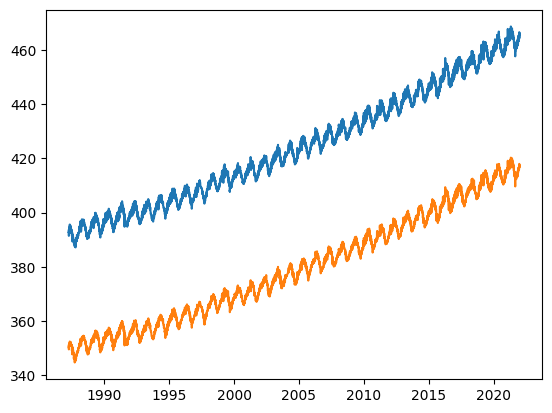

In [28]:
plt.plot([row['decimal_year'] for row in co2e_data], [row['co2e'] for row in co2e_data])
plt.plot([row['decimal_year'] for row in co2e_data], [row['co2_concentration'] for row in co2e_data])


The plot below shows just the methane concentration over time. Note how it was was rising during the 90's and then seemed to level off during the 2000's. But, alarmingly, it started to rapidly rise again from about 2007 onwards. This is a worrying trend. As you can see from the previous plot, although methane concentrations are much lower than co2 concentrations, they make a significant contribution to the total global warming potential -- equivalent to over 50 ppm of CO2, or two decades worth of CO2 emission increases at current rates. So rapid increases in methane concentrations are a major concern. 

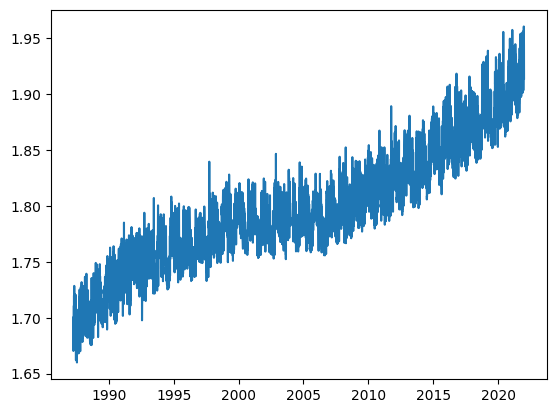

In [29]:
plt.plot([row['decimal_year'] for row in co2e_data], [row['ch4_concentration'] for row in co2e_data])

*Copyright &copy; 2023 Jon Barker, University of Sheffield. All rights reserved*.
